In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import mean_absolute_error, mean_squared_error,\
    confusion_matrix, plot_confusion_matrix, classification_report,\
    accuracy_score, plot_roc_curve

from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer, LabelEncoder

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn import set_config

from sklearn import decomposition

from xgboost import XGBRegressor
from xgboost import XGBClassifier

# import data

- baseline

In [3]:
df_baseline = pd.read_csv('Output_Data\Model_1_baseline_data.csv')
df.head()

,label,age,gender,residence,city,city_rank,series_dev,series_group,emui_dev,device_name,...,creat_type_cd,adv_prim_id,inter_type_cd,slot_id,spread_app_id,hispace_app_tags,app_second_class,app_score,u_refreshTimes,u_feedLifeCycle
0,0,3,2,16,147,2,32,6,35,312,...,6,1846,4,46,162,47,14,10.0,0,15
1,1,3,2,16,147,2,32,6,35,312,...,8,1060,4,37,344,20,13,10.0,0,15
2,1,3,2,16,147,2,32,6,35,312,...,8,1060,4,37,344,20,13,10.0,0,15
3,0,3,2,16,147,2,32,6,35,312,...,8,1542,4,47,152,49,17,10.0,0,15
4,0,3,2,16,147,2,32,6,35,312,...,8,1036,4,44,312,43,18,10.0,0,15


In [4]:
df_baseline_sub = df_baseline.sample(n=100000,random_state=23333)
df_baseline_sub.label.value_counts(normalize=True)

# pick one subset, 100k
# that value counts match original most

0    0.98452
1    0.01548
Name: label, dtype: float64

In [5]:
df_baseline_sub.shape

(100000, 24)

- engineered

In [ ]:
df = pd.read_csv('Output_Data\data_subset_engineered_for_model.csv')
df.head()

# already subset, 100k

# train test split

- baseline

In [6]:
X = df_baseline_sub.drop(columns='label')
y = df_baseline_sub.label

X_baseline_sub_train, X_baseline_sub_test, y_baseline_sub_train, y_baseline_sub_test = train_test_split(X, y, test_size=0.2, random_state=2333)

X_baseline_sub_train.shape, X_baseline_sub_test.shape

((80000, 23), (20000, 23))

- full baseline

In [7]:
X_full = df_baseline.drop(columns='label')
y_full = df_baseline.label

X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_full, y_full, test_size=0.2, random_state=2333)

X_full_train.shape, X_full_test.shape

((6140413, 23), (1535104, 23))

- engineered

In [23]:
X2 = df.drop(columns='label')
y2 = df.label

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=2333)

X2_train.shape, X2_test.shape

((6140413, 23), (1535104, 23))

# XGBOOST

- baseline subset 100k, default setting

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19688
           1       0.00      0.00      0.00       312

    accuracy                           0.98     20000
   macro avg       0.49      0.50      0.50     20000
weighted avg       0.97      0.98      0.98     20000



c:\Users\qwswe\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\qwswe\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\qwswe\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


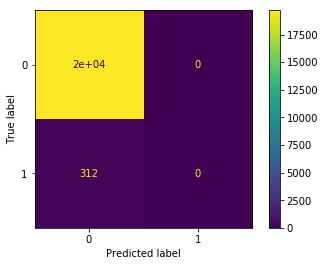

In [10]:
# default
 
xgb_clf_baseline = XGBClassifier(tree_method='gpu_hist', gpu_id=0) # using GPU
xgb_clf_baseline.fit(X_baseline_sub_train, y_baseline_sub_train)

print(classification_report(y_baseline_sub_test, xgb_clf_baseline.predict(X_baseline_sub_test)))
plot_confusion_matrix(xgb_clf_baseline, X_baseline_sub_test, y_baseline_sub_test)

- baseline full 7.6M, default

In [5]:
# let's try to run default on full dataset

X_full_train.shape

(6140413, 23)

c:\Users\qwswe\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\qwswe\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\qwswe\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99   1511307
           1       0.00      0.00      0.00     23797

    accuracy                           0.98   1535104
   macro avg       0.49      0.50      0.50   1535104
weighted avg       0.97      0.98      0.98   1535104



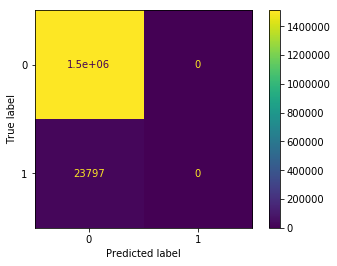

In [8]:
 
xgb_clf_baseline = XGBClassifier(tree_method='gpu_hist', gpu_id=0) # using GPU
xgb_clf_baseline.fit(X_full_train, y_full_train)

print(classification_report(y_full_test, xgb_clf_baseline.predict(X_full_test)))
plot_confusion_matrix(xgb_clf_baseline, X_full_test, y_full_test)

- baseline subset 100k, fine tune

In [16]:
params = {'scale_pos_weight':[2,4,6],'colsample_bytree':[.3,.5,.7],'gamma': [1,2,3], 'n_estimators': [125,150,200]}

gs = GridSearchCV(estimator = XGBClassifier(tree_method='gpu_hist', gpu_id=0), scoring='recall',
                  param_grid = params, cv = 5)
                  
gs.fit(X_baseline_sub_train,y_baseline_sub_train);

# 11min! for 5 feature * 3 var

In [17]:
gs.best_estimator_

XGBClassifier(colsample_bytree=0.7, gamma=4, gpu_id=0, n_estimators=175,
              scale_pos_weight=6, tree_method='gpu_hist')

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19688
           1       0.18      0.11      0.13       312

    accuracy                           0.98     20000
   macro avg       0.58      0.55      0.56     20000
weighted avg       0.97      0.98      0.98     20000

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     78764
           1       0.28      0.17      0.21      1236

    accuracy                           0.98     80000
   macro avg       0.63      0.58      0.60     80000
weighted avg       0.98      0.98      0.98     80000



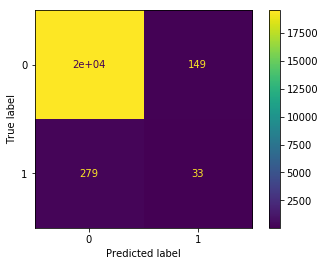

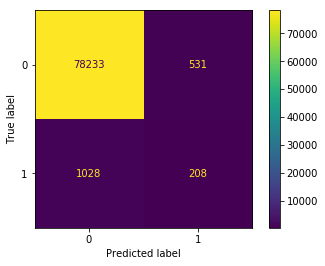

In [18]:
best_mod = gs.best_estimator_
best_mod.fit(X_baseline_sub_train,y_baseline_sub_train);

print(classification_report(y_baseline_sub_test, best_mod.predict(X_baseline_sub_test)))
plot_confusion_matrix(best_mod, X_baseline_sub_test, y_baseline_sub_test)

print(classification_report(y_baseline_sub_train, best_mod.predict(X_baseline_sub_train)))
plot_confusion_matrix(best_mod, X_baseline_sub_train, y_baseline_sub_train)

- baseline full 7.6M, fine tune

              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1511307
           1       0.22      0.13      0.17     23797

    accuracy                           0.98   1535104
   macro avg       0.60      0.56      0.58   1535104
weighted avg       0.97      0.98      0.98   1535104



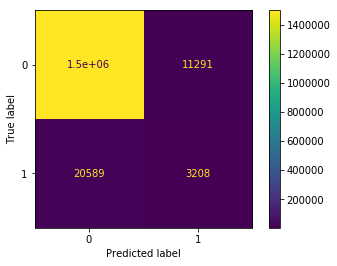

In [27]:
xgb_clf_baseline = XGBClassifier(colsample_bytree=0.7, gamma=4, gpu_id=0, n_estimators=175,
              scale_pos_weight=6, tree_method='gpu_hist') # using GPU
xgb_clf_baseline.fit(X_baseline_train, y_baseline_train)

print(classification_report(y_baseline_test, xgb_clf_baseline.predict(X_baseline_test)))
plot_confusion_matrix(xgb_clf_baseline, X_baseline_test, y_baseline_test)